Hola Ariel!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Optimización de los gastos de marketing

La tarea principal del proyecto es ayudar a optimizar los gastos de marketing.

Se tiene:

- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Lo que se va a investigar:

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente Ariel! Siempre es bueno incluir esta sección introductoria, te recomendaría redactar un poco más acerca del objetivo del análisis
</div>

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [1]:
# Carga los archivos de datos en diferentes DataFrames
df_data_on_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_data_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_variable_expenses = pd.read_csv('/datasets/costs_us.csv')

NameError: name 'pd' is not defined

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Librerías y datos cargados correctamente
</div>

## Preparar los datos

### Datos de visitas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_data_on_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Imprime una muestra de los datos para las tarifas
display(df_data_on_visits.head())

duplicates = df_data_on_visits.duplicated().sum()
print("En la tabla Datos de Visitas exiten: ", duplicates , "valores duplicados")

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


En la tabla Datos de Visitas exiten:  0 valores duplicados


### Datos de pedidos

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
# Imprime una muestra de los datos para las tarifas
display(df_data_orders.head())

duplicates = df_data_orders.duplicated().sum()
print("En la tabla Datos de Pedidos exiten: ", duplicates , "valores duplicados")

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


En la tabla Datos de Pedidos exiten:  0 valores duplicados


### Datos de costos

In [7]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_variable_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [8]:
# Imprime una muestra de los datos para las tarifas
display(df_variable_expenses.head())

duplicates = df_variable_expenses.duplicated().sum()
print("En la tabla Datos de Costos exiten: ", duplicates , "valores duplicados")

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


En la tabla Datos de Costos exiten:  0 valores duplicados


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la primera revisión de tus datos! Para que se muestre el resultado en formato de tabla puedes usar `display()` en lugar de print cuando uses .head()
</div>

## Correción de los datos

### Datos de visitas / "df_data_on_visits"

<font color='#613EF0'>Luego de realizar las correcciones del dataframe se concluyó lo siguiente:</font>

- <font color='#613EF0'>No existe datos ausentes ni duplicados en las columnas del dataframe.</font>
- <font color='#613EF0'>A la columna Device se la transformo a tipo de dato category y a las columnas End Ts y Start Ts fueron transformadas al tipo de dato Datetime para reducir el tamaño de almacenamieto del dataframe.</font>

In [9]:
print("----------------------Columna Device------------------------")

#Verificar si existen valores ausentes en esta columna
absents_device = df_data_on_visits['Device'].isna().sum()
print("Existen: ", absents_device, "valores ausentes en la columna ""device")

print("---------------------------------------------------------------")

unique_device = df_data_on_visits['Device'].unique()
print("Devices existentes en el dataset:")
print(unique_device)

print("---------------------------------------------------------------")

#Convertir el tipo de dato de Object a Categoria
df_data_on_visits['Device'] = df_data_on_visits['Device'].astype('category')

#df_data_on_visits.info()

print("----------------------Columnas End Ts y Start Ts------------------------")

#Verificar si existen valores ausentes en esta columna
absents_endTs = df_data_on_visits['End Ts'].isna().sum()
print("Existen: ", absents_endTs, "valores ausentes en la columna ""End Ts")

#Verificar si existen valores ausentes en esta columna
absents_startTs = df_data_on_visits['Start Ts'].isna().sum()
print("Existen: ", absents_startTs, "valores ausentes en la columna ""Start Ts")

print("---------------------------------------------------------------")

df_data_on_visits['End Ts'] =  pd.to_datetime(df_data_on_visits['End Ts'], format="%Y-%m-%d %H:%M:%S")
df_data_on_visits['Start Ts'] =  pd.to_datetime(df_data_on_visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")

#df_data_on_visits.info()

print("----------------------Columnas Source Id------------------------")

#Verificar si existen valores ausentes en esta columna
absents_sourceId = df_data_on_visits['Source Id'].isna().sum()
print("Existen: ", absents_sourceId, "valores ausentes en la columna ""Source Id")

print("---------------------------------------------------------------")

unique_sourceId = df_data_on_visits['Source Id'].unique()
print("Source Id existentes en el dataset:")
print(unique_sourceId)

print("----------------------Columnas Uid------------------------")

#Verificar si existen valores ausentes en esta columna
absents_uid = df_data_on_visits['Uid'].isna().sum()
print("Existen: ", absents_uid, "valores ausentes en la columna ""Uid")

----------------------Columna Device------------------------
Existen:  0 valores ausentes en la columna device
---------------------------------------------------------------
Devices existentes en el dataset:
['touch' 'desktop']
---------------------------------------------------------------
----------------------Columnas End Ts y Start Ts------------------------
Existen:  0 valores ausentes en la columna End Ts
Existen:  0 valores ausentes en la columna Start Ts
---------------------------------------------------------------
----------------------Columnas Source Id------------------------
Existen:  0 valores ausentes en la columna Source Id
---------------------------------------------------------------
Source Id existentes en el dataset:
[ 4  2  5  9  3  1 10  7  6]
----------------------Columnas Uid------------------------
Existen:  0 valores ausentes en la columna Uid


### Datos de visitas / "df_data_orders"

<font color='#613EF0'>Luego de realizar las correcciones del dataframe se concluyó lo siguiente:</font>

- <font color='#613EF0'>No existe datos ausentes ni duplicados en las columnas del dataframe.</font>
- <font color='#613EF0'>A la columna Buy Ts fue transformada al tipo de dato Datetime para reducir el tamaño de almacenamieto del dataframe.</font>

In [10]:
print("----------------------Columna Revenue------------------------")

#Verificar si existen valores ausentes en esta columna
absents_revenue = df_data_orders['Revenue'].isna().sum()
print("Existen: ", absents_revenue, "valores ausentes en la columna ""revenue")

print("---------------------------------------------------------------")

# Obtener el valor máximo y mínimo de la columna 'Revenue'
max_revenue = df_data_orders['Revenue'].max()
min_revenue = df_data_orders['Revenue'].min()

print("Valor máximo en 'Revenue':", max_revenue)
print("Valor mínimo en 'Revenue':", min_revenue)


print("----------------------Columnas Buy Ts------------------------")

#Verificar si existen valores ausentes en esta columna
absents_buyts = df_data_orders['Buy Ts'].isna().sum()
print("Existen: ", absents_buyts, "valores ausentes en la columna ""Buy Ts")

df_data_orders['Buy Ts'] =  pd.to_datetime(df_data_orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

print("----------------------Columnas Uid------------------------")

#Verificar si existen valores ausentes en esta columna
absents_uid = df_data_orders['Uid'].isna().sum()
print("Existen: ", absents_uid, "valores ausentes en la columna ""Uid")

df_data_on_visits.info()

----------------------Columna Revenue------------------------
Existen:  0 valores ausentes en la columna revenue
---------------------------------------------------------------
Valor máximo en 'Revenue': 2633.28
Valor mínimo en 'Revenue': 0.0
----------------------Columnas Buy Ts------------------------
Existen:  0 valores ausentes en la columna Buy Ts
----------------------Columnas Uid------------------------
Existen:  0 valores ausentes en la columna Uid
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### Datos de visitas / "df_variable_expenses"

<font color='#613EF0'>Luego de realizar las correcciones del dataframe se concluyó lo siguiente:</font>

- <font color='#613EF0'>No existe datos ausentes ni duplicados en las columnas del dataframe.</font>
- <font color='#613EF0'>A la columna Buy Ts fue transformada al tipo de dato Datetime para reducir el tamaño de almacenamieto del dataframe.</font>

In [11]:
print("----------------------Columna Source Id------------------------")

#Verificar si existen valores ausentes en esta columna
absents_sourceid = df_variable_expenses['source_id'].isna().sum()
print("Existen: ", absents_sourceid, "valores ausentes en la columna ""source_id")

print("---------------------------------------------------------------")

unique_sourceid = df_variable_expenses['source_id'].unique()
print("Source Id existentes en el dataset:")
print(unique_sourceid)


print("----------------------Columna dt------------------------")

#Verificar si existen valores ausentes en esta columna
absents_dt = df_variable_expenses['dt'].isna().sum()
print("Existen: ", absents_buyts, "valores ausentes en la columna ""dt")

df_variable_expenses['dt'] =  pd.to_datetime(df_variable_expenses['dt'], format="%Y-%m-%d")

print("----------------------Columnas Costs------------------------")

#Verificar si existen valores ausentes en esta columna
absents_costs = df_variable_expenses['costs'].isna().sum()
print("Existen: ", absents_costs, "valores ausentes en la columna ""costs")

# Obtener el valor máximo y mínimo de la columna 'Revenue'
max_costs = df_variable_expenses['costs'].max()
min_costs = df_variable_expenses['costs'].min()

print("Valor máximo en 'Revenue':", max_revenue)
print("Valor mínimo en 'Revenue':", min_revenue)

df_variable_expenses.info()

----------------------Columna Source Id------------------------
Existen:  0 valores ausentes en la columna source_id
---------------------------------------------------------------
Source Id existentes en el dataset:
[ 1  2  3  4  5  9 10]
----------------------Columna dt------------------------
Existen:  0 valores ausentes en la columna dt
----------------------Columnas Costs------------------------
Existen:  0 valores ausentes en la columna costs
Valor máximo en 'Revenue': 2633.28
Valor mínimo en 'Revenue': 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando datos ausentes y duplicados
</div>

## Analisis de los datos

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [12]:
daily_users = df_data_on_visits.groupby(df_data_on_visits['Start Ts'].dt.date)['Uid'].nunique()
print(daily_users)

Start Ts
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: Uid, Length: 364, dtype: int64


In [13]:
weekly_users = df_data_on_visits.groupby(df_data_on_visits['Start Ts'].dt.to_period('W'))['Uid'].nunique()
print(weekly_users)

Start Ts
2017-05-29/2017-06-04     2021
2017-06-05/2017-06-11     4129
2017-06-12/2017-06-18     2812
2017-06-19/2017-06-25     2878
2017-06-26/2017-07-02     3064
2017-07-03/2017-07-09     3294
2017-07-10/2017-07-16     4355
2017-07-17/2017-07-23     3841
2017-07-24/2017-07-30     2655
2017-07-31/2017-08-06     2364
2017-08-07/2017-08-13     2444
2017-08-14/2017-08-20     2746
2017-08-21/2017-08-27     3116
2017-08-28/2017-09-03     3694
2017-09-04/2017-09-10     4412
2017-09-11/2017-09-17     4319
2017-09-18/2017-09-24     4874
2017-09-25/2017-10-01     6241
2017-10-02/2017-10-08     7612
2017-10-09/2017-10-15     7074
2017-10-16/2017-10-22     7148
2017-10-23/2017-10-29     7401
2017-10-30/2017-11-05     7480
2017-11-06/2017-11-12     7179
2017-11-13/2017-11-19     8117
2017-11-20/2017-11-26    10586
2017-11-27/2017-12-03     8166
2017-12-04/2017-12-10     8407
2017-12-11/2017-12-17     8214
2017-12-18/2017-12-24     7172
2017-12-25/2017-12-31     7774
2018-01-01/2018-01-07     6918

In [14]:
monthly_users = df_data_on_visits.groupby(df_data_on_visits['Start Ts'].dt.to_period('M'))['Uid'].nunique()
print(monthly_users)

Start Ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
2017-11    32797
2017-12    31557
2018-01    28716
2018-02    28749
2018-03    27473
2018-04    21008
2018-05    20701
Freq: M, Name: Uid, dtype: int64


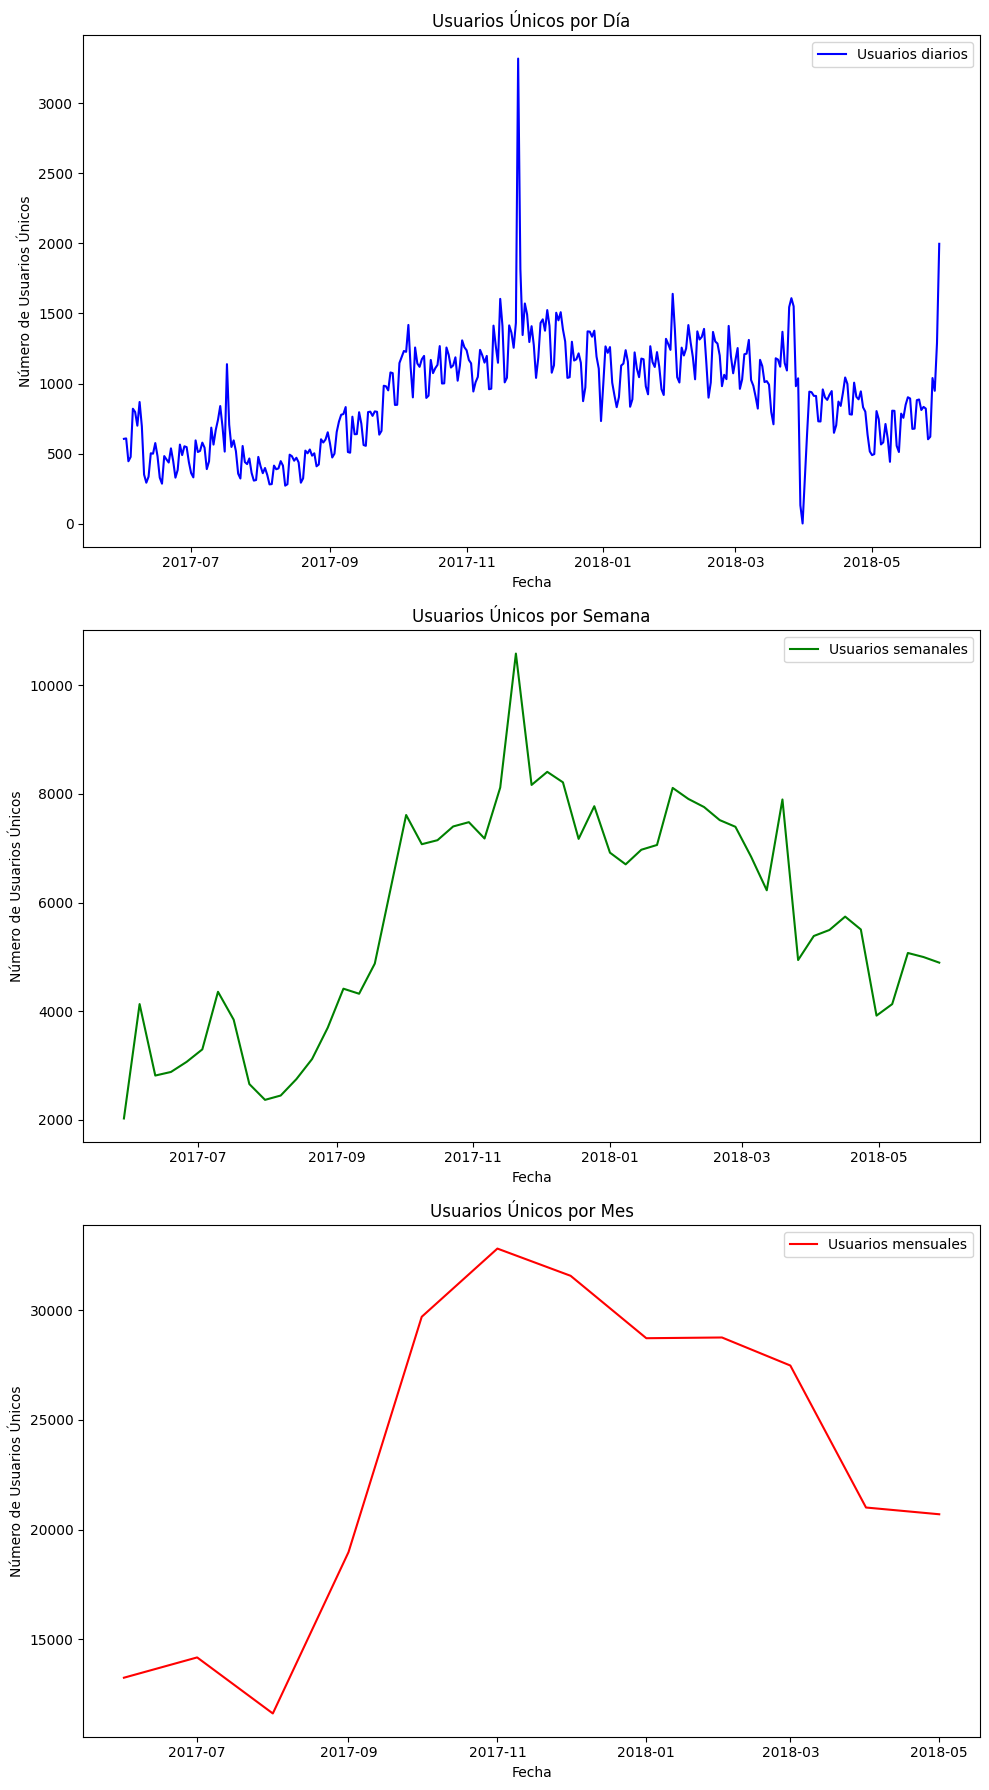

In [15]:
# Convertir los índices de weekly_users y monthly_users a datetime
weekly_users.index = weekly_users.index.to_timestamp()
monthly_users.index = monthly_users.index.to_timestamp()

# Crear subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Gráfico de usuarios diarios
axs[0].plot(daily_users, label='Usuarios diarios', color='blue')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Número de Usuarios Únicos')
axs[0].set_title('Usuarios Únicos por Día')
axs[0].legend()

# Gráfico de usuarios semanales
axs[1].plot(weekly_users, label='Usuarios semanales', color='green')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Número de Usuarios Únicos')
axs[1].set_title('Usuarios Únicos por Semana')
axs[1].legend()

# Gráfico de usuarios mensuales
axs[2].plot(monthly_users, label='Usuarios mensuales', color='red')
axs[2].set_xlabel('Fecha')
axs[2].set_ylabel('Número de Usuarios Únicos')
axs[2].set_title('Usuarios Únicos por Mes')
axs[2].legend()

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cálculos! Pero al tener escalas sumamente diferentes te recomendaría separar los gráficos en 3 diferentes figuras. Puedes usar subplots para mostrar en 3 figuras las gráficas diarias, semanales y mensuales
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la corrección! No olvides redactar tus interpretaciones cuando muestres gráficas como estas
</div>

#### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)


In [16]:
#Número de sesiones por día
daily_sessions = df_data_on_visits.groupby(df_data_on_visits['Start Ts'].dt.date)['Uid'].count()
print(daily_sessions)

Start Ts
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: Uid, Length: 364, dtype: int64


#### ¿Cuál es la duración de cada sesión?

In [17]:
# Calcular la duración de cada sesión en segundos
df_data_on_visits['session_duration'] = (df_data_on_visits['End Ts'] - df_data_on_visits['Start Ts']).dt.total_seconds()

# Verificar algunas de las duraciones
print(df_data_on_visits[['Uid', 'Start Ts', 'End Ts', 'session_duration']].head(10))

                    Uid            Start Ts              End Ts  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:38:00   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 17:21:00   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 11:23:00   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00   
5  16007536194108375387 2017-09-03 21:35:00 2017-09-03 21:36:00   
6   6661610529277171451 2018-01-30 11:13:00 2018-01-30 12:09:00   
7  11423865690854540312 2017-11-05 15:14:00 2017-11-05 15:15:00   
8   2987360259350925644 2017-07-19 10:41:00 2017-07-19 10:44:00   
9   1289240080042562063 2017-11-08 13:42:00 2017-11-08 13:43:00   

   session_duration  
0            1080.0  
1            1680.0  
2               0.0  
3            1440.0  
4               0.0  
5              60.0  
6            3360.0  
7              60.0  
8             180.0  
9              60.0  


#### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [34]:
# Ordenar los datos por usuario y por tiempo de inicio
visits_sorted = df_data_on_visits.sort_values(by=['Uid', 'Start Ts'])

# Filtrar los usuarios que tienen más de una sesión
users_with_multiple_sessions = visits_sorted.groupby('Uid').filter(lambda x: len(x) > 1)

# Recalcular el tiempo entre sesiones consecutivas para usuarios con más de una sesión
users_with_multiple_sessions['time_to_next_session'] = users_with_multiple_sessions.groupby('Uid')['Start Ts'].diff().dt.total_seconds()

# Remover los valores NaN y calcular estadísticas
time_diffs = users_with_multiple_sessions['time_to_next_session'].dropna()

# Mostrar estadísticas descriptivas sobre los tiempos entre sesiones
display(time_diffs.head())

192554    13192080.0
113873     1821960.0
41778     12866640.0
141543       10860.0
130654     6792120.0
Name: time_to_next_session, dtype: float64

#### Conclusiones sobre el análisis de vistas

- Aunque existen días donde se tienen pocas sesiones, también existen otros en donde se tiene un buen flujo de usuarios utilizando la aplicación.

- Se tiene buenos tiempos de duración de sesiones en los usuarios llegando inclusive a una hora de sesión.

- Por otro lado, existen muchos usuarios los cuales ya no regresan. Par entender este factor debería calcularse una tasa de retención y/o cancelación para saber que está pasando. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo revisar la forma en la que estás calculando la frecuencia de regreso de los usuarios ya que tienes en su mayoría valores NaN o ausentes 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la corrección!
</div>

### Ventas

#### ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

In [19]:
# Unir las tablas de visitas y pedidos en función del Uid
merged_data = pd.merge(df_data_on_visits[['Uid', 'Start Ts', 'Source Id']], df_data_orders[['Uid', 'Buy Ts']], on='Uid', how='inner')

# Ordenar por uid y fecha de registro para asegurar que estamos analizando la primera compra
merged_data = merged_data.sort_values(by=['Uid', 'Start Ts', 'Buy Ts'])

# Calcular el tiempo entre registro y la primera compra en días
merged_data['conversion_time'] = (merged_data['Buy Ts'] - merged_data['Start Ts']).dt.days

# Eliminar filas duplicadas por usuario para asegurarse de tomar solo la primera compra
merged_data = merged_data.drop_duplicates(subset='Uid', keep='first')

# Categorizar según el tiempo de conversión
merged_data['conversion_category'] = 'Conversion ' + merged_data['conversion_time'].astype(str) + 'd'

# Verificar algunas de las conversiones
print(merged_data.head(10))

print("---------------------------------------------------------")

# Agrupar por fecha de registro o fuente de marketing
conversion_analysis = merged_data.groupby(['Start Ts', 'conversion_category']).agg({'Uid': 'count'}).reset_index()

# O bien agrupar por fuente de tráfico si se tiene la columna source_id
conversion_by_channel = merged_data.groupby(['Source Id', 'conversion_category']).agg({'Uid': 'count'}).reset_index()

# Ver los primeros resultados
print(conversion_analysis.head())
print(conversion_by_channel.head())

                     Uid            Start Ts  Source Id              Buy Ts  \
726879   313578113262317 2017-09-18 22:49:00          2 2018-01-03 21:51:00   
761754  1575281904278712 2017-06-03 10:13:00         10 2017-06-03 10:13:00   
760939  2429014661409475 2017-10-11 17:14:00          3 2017-10-11 18:33:00   
685776  2464366381792757 2018-01-27 20:10:00          5 2018-01-28 15:54:00   
719044  2551852515556206 2017-11-24 10:14:00          5 2017-11-24 10:14:00   
745812  3077748354309989 2018-03-03 12:08:00          3 2018-03-03 12:33:00   
623128  3605148382144603 2017-08-15 21:54:00          2 2017-09-21 20:56:00   
533466  3753586865891862 2018-03-03 13:47:00          4 2018-03-03 13:50:00   
696689  4808417689019433 2018-01-09 23:10:00          4 2018-01-09 23:32:00   
757542  4992223027560440 2018-04-04 13:54:00          5 2018-04-04 13:54:00   

        conversion_time conversion_category  
726879              106     Conversion 106d  
761754                0       Conversi

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [20]:
# Agrupar por día, semana o mes y contar los pedidos
orders_per_period = df_data_orders.resample('D', on='Buy Ts').agg({'Uid': 'count'}).reset_index()
orders_per_period.columns = ['Date', 'Number of Orders']

# Ver los primeros resultados
print(orders_per_period.head())

        Date  Number of Orders
0 2017-06-01                96
1 2017-06-02               111
2 2017-06-03                67
3 2017-06-04                66
4 2017-06-05               161


#### ¿Cuál es el tamaño promedio de compra?

In [21]:
# Calcular el tamaño promedio de compra
avg_order_size = df_data_orders['Revenue'].sum() / df_data_orders['Uid'].nunique()

# Mostrar el tamaño promedio de compra
print(f"Tamaño promedio de compra: {avg_order_size}")

Tamaño promedio de compra: 6.9013279303452615


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cálculos!
</div>

#### ¿Cuánto dinero traen? (LTV)

In [22]:
# Calcular LTV para cada usuario
ltv_per_user = df_data_orders.groupby('Uid')['Revenue'].sum().reset_index()
ltv_per_user.columns = ['Uid', 'LTV']

# Calcular el promedio de LTV
average_ltv = ltv_per_user['LTV'].mean()

# Mostrar el LTV promedio
print(f"Valor de vida promedio del cliente (LTV): {average_ltv}")

Valor de vida promedio del cliente (LTV): 6.901327930345262


#### Conclusiones sobre el análisis de ventas

- Se puede observar que mayormente la conversión de tiempo para que un cliente se decida a comprar es en el mismo día, es decir, en el día cero. 
- Si se tiene un periodo de tiempo de 5 días, se tiene unos 501 pedidos aproximadamente. 
- El LTV y el tamaño promedio de compra de un cliente, es un número muy parecido para cada uno de estas medidas. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El LTV debe tener más detalle en su cálculo, deberías analizar para cada cohort el LTV según su primer mes de ordenar. Esto puedes hacerlo con un pivot_table y luego mostrarlo con una visualización de mapa de calor
</div>

### Marketing

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [23]:
# 1. Cálculo del gasto total
total_marketing_cost = df_variable_expenses['costs'].sum()
print(f"Gasto total en marketing: {total_marketing_cost}")

Gasto total en marketing: 329131.62


In [24]:
# 2. Gasto por fuente de adquisición
costs_by_source = df_variable_expenses.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'total_cost']
print("Gastos por fuente de adquisición:")
print(costs_by_source)

Gastos por fuente de adquisición:
   source_id  total_cost
0          1    20833.27
1          2    42806.04
2          3   141321.63
3          4    61073.60
4          5    51757.10
5          9     5517.49
6         10     5822.49


In [25]:
# 3. Gasto a lo largo del tiempo
costs_over_time = df_variable_expenses.groupby('dt')['costs'].sum().reset_index()
print("Gastos a lo largo del tiempo:")
print(costs_over_time)

Gastos a lo largo del tiempo:
            dt    costs
0   2017-06-01   735.26
1   2017-06-02   721.19
2   2017-06-03   450.85
3   2017-06-04   761.16
4   2017-06-05   821.44
..         ...      ...
359 2018-05-27   532.87
360 2018-05-28   619.44
361 2018-05-29   784.79
362 2018-05-30  1183.00
363 2018-05-31  2153.70

[364 rows x 2 columns]


#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [26]:
# Unir las tablas `visits` y `orders` usando el identificador de usuario (Uid) para identificar clientes y sus fuentes
merged_data = pd.merge(df_data_on_visits, df_data_orders, left_on='Uid', right_on='Uid', how='inner')

# Agrupar por `source_id` y contar el número de clientes únicos
clients_per_source = merged_data.groupby('Source Id')['Uid'].nunique().reset_index()
clients_per_source.columns = ['source_id', 'num_customers']

print("Número de clientes por fuente:")
print(clients_per_source)

Número de clientes por fuente:
   source_id  num_customers
0          1           7138
1          2           7305
2          3          13846
3          4          14253
4          5          10156
5          7              1
6          9           2793
7         10           1773


In [27]:
# Agrupar por fuente de adquisición para obtener el gasto total
costs_by_source = df_variable_expenses.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'total_cost']

# Unir los datos de costos con el número de clientes adquiridos
cac_data = pd.merge(costs_by_source, clients_per_source, on='source_id')

# Calcular el CAC
cac_data['cac'] = cac_data['total_cost'] / cac_data['num_customers']

print("Costo de adquisición de clientes por fuente:")
print(cac_data[['source_id', 'cac']])

Costo de adquisición de clientes por fuente:
   source_id        cac
0          1   2.918642
1          2   5.859828
2          3  10.206676
3          4   4.284965
4          5   5.096209
5          9   1.975471
6         10   3.283976


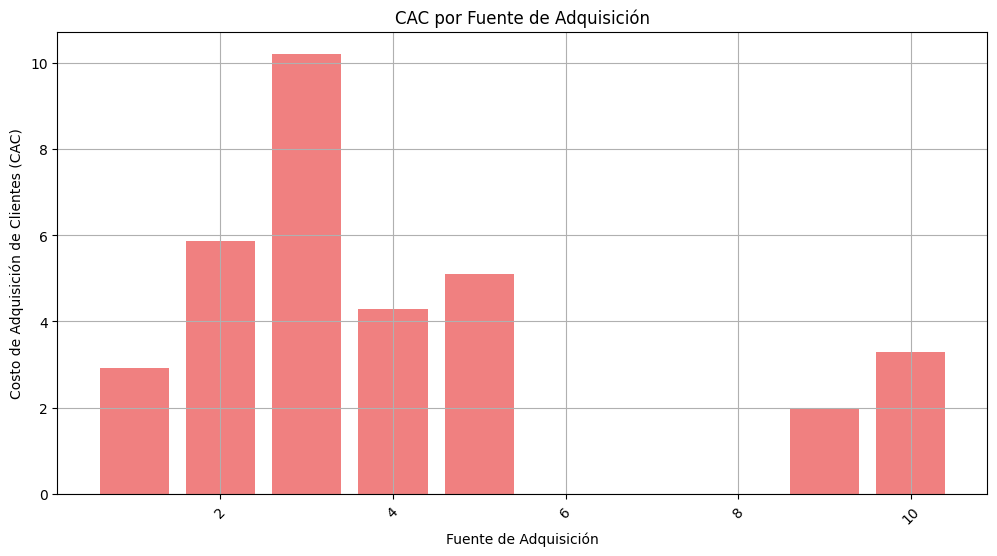

In [28]:
# Graficar el CAC por fuente de adquisición
plt.figure(figsize=(12, 6))
plt.bar(cac_data['source_id'], cac_data['cac'], color='lightcoral')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('Costo de Adquisición de Clientes (CAC)')
plt.title('CAC por Fuente de Adquisición')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### ¿Cuán rentables eran las inversiones? (ROMI)

In [29]:
# Unir las tablas `visits` y `orders` para atribuir ingresos a cada fuente
merged_data = pd.merge(df_data_on_visits, df_data_orders, left_on='Uid', right_on='Uid', how='inner')

# Agrupar por `source_id` y sumar los ingresos
revenue_by_source = merged_data.groupby('Source Id')['Revenue'].sum().reset_index()
revenue_by_source.columns = ['source_id', 'total_revenue']

print("Ingresos totales por fuente:")
print(revenue_by_source)

Ingresos totales por fuente:
   source_id  total_revenue
0          1   2.298200e+06
1          2   2.638189e+06
2          3   2.966880e+05
3          4   4.966902e+05
4          5   1.181477e+06
5          7   1.220000e+00
6          9   3.634225e+04
7         10   1.461923e+04


In [30]:
# Agrupar por `source_id` para obtener el costo total de marketing
costs_by_source = df_variable_expenses.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'total_cost']

print("Costo total de marketing por fuente:")
print(costs_by_source)

Costo total de marketing por fuente:
   source_id  total_cost
0          1    20833.27
1          2    42806.04
2          3   141321.63
3          4    61073.60
4          5    51757.10
5          9     5517.49
6         10     5822.49


In [31]:
# Unir los datos de ingresos con el costo de marketing
romi_data = pd.merge(revenue_by_source, costs_by_source, on='source_id')

# Calcular el ROMI
romi_data['romi'] = (romi_data['total_revenue'] - romi_data['total_cost']) / romi_data['total_cost']

print("ROMI por fuente de adquisición:")
print(romi_data[['source_id', 'romi']])

ROMI por fuente de adquisición:
   source_id        romi
0          1  109.313944
1          2   60.631237
2          3    1.099381
3          4    7.132649
4          5   21.827344
5          9    5.586736
6         10    1.510821


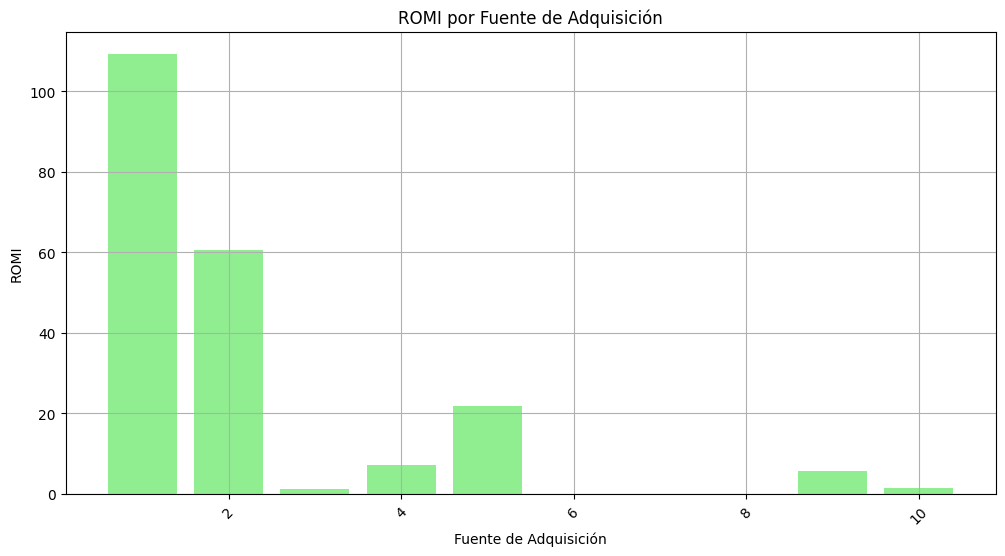

In [32]:
# Graficar el ROMI por fuente de adquisición
plt.figure(figsize=(12, 6))
plt.bar(romi_data['source_id'], romi_data['romi'], color='lightgreen')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('ROMI')
plt.title('ROMI por Fuente de Adquisición')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con estos cálculos!
</div>

## Conclusiones finales

### Aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  

- La plataforma o fuente número 1 y 2, son las elecciones que yo recomendarìa a los expertos en marketing. Esto es debido a que tienen un CAC bajo y un ROMI bastante benificioso. Inclusive la plataforma 1, llega a tener un valor que supera el 100. 

- Plataformas como la nùmero 3 deberìa ser eliminada o actualizada de alguna manera, ya que, tiene un CAC elevado y un casi nulo ROMU. 

- Para las plataformas como la nùmero 1 y 2, no importa mucho que tipo de dispositivo se utilice, pues, presentan unos altor valores de ROMI y bajo CAC. Aunque la plataforma nùmero 2, tenga un CAC elevado, gracias a su ROMI llega a ser beneficiosa.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho Ariel! De manera general puedo decirte que presentaste un proyecto muy completo.
    
Como recomendación es que redactes un poco más tus hallazgos a lo largo de tu notebook, ya que lo importante es saber comunicar lo que encontramos en los análisis.
  
Hay un par de puntos que se pueden complementar mejor, te he dejado algunos comentarios.
    
Saludos!
</div>